In [10]:
%matplotlib inline

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
import sys,glob,json

In [4]:
sys.path.insert(1,'/work/yifan.wang/eccentricity/')

In [5]:
from Gwaveformtools import *

# Debug

In [6]:
nr = RITwave(1632)

In [7]:
par = get_parameter(20,nr.metadata)

In [8]:
nr_phy = nr.hp_m_ihc_phyunit(**par)

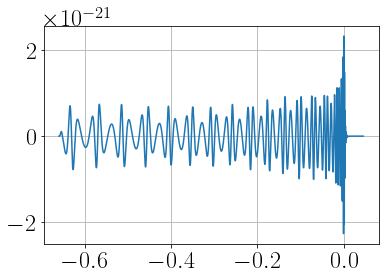

In [11]:
plt.plot(nr_phy.sample_times,nr_phy)

In [15]:
taper_window = nr_phy.duration * 0.1
nr_taper = td_taper(nr_phy,nr_phy.start_time,nr_phy.start_time+taper_window)

/work/yifan.wang/eccentricity/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


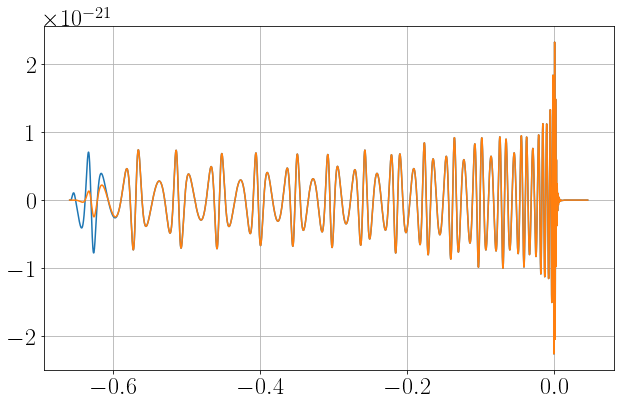

In [72]:
plt.plot(nr_phy.sample_times,nr_phy)
plt.plot(nr_taper.sample_times,nr_taper)

In [17]:
float(nr.metadata['freq-start-22-Hz-1Msun'])/20

25.0

# Phase

In [30]:
i0 = np.where(nr_taper.sample_times>0)[0][0]
phase2 = np.angle(nr_taper.data[:i0])
phase2 = np.unwrap(phase2)
freq2 = np.gradient(phase2, nr_taper.sample_times[:i0])/2/np.pi

In [32]:
i0

6696

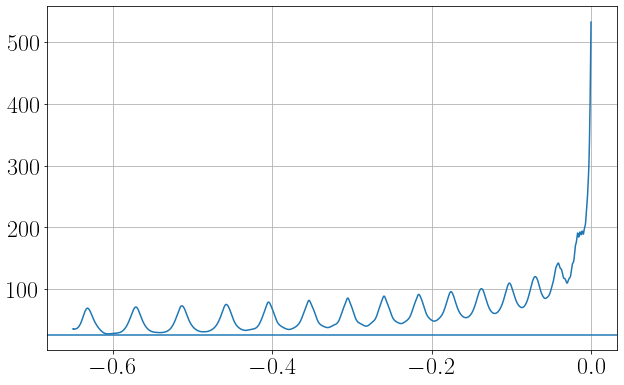

In [42]:
istart = 100
plt.plot(nr_taper.sample_times[istart:i0],freq2[istart:])
plt.axhline(25)

In [47]:
par.update({'eccentricity':0.1528})

In [48]:
nr_taper.delta_t

9.850982051087151e-05

In [66]:
dt = nr_taper.delta_t
hp, hc = get_td_waveform(**par,
                                 approximant='SEOBNREHM',
                                 delta_t=dt,
                                 f_lower=50,is_only_22=1)

In [67]:
taper_window = hp.duration * 0.1
hp_taper = td_taper(hp,hp.start_time,hp.start_time+taper_window)
hc_taper = td_taper(hc,hc.start_time,hc.start_time+taper_window)

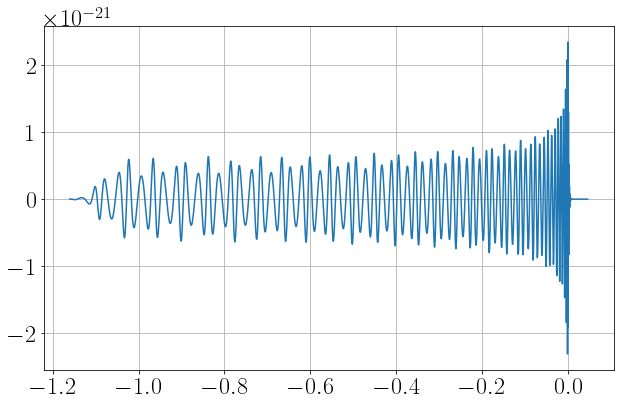

In [68]:
plt.plot(hp_taper.sample_times,hp_taper)

In [69]:
h = hp-1j*hc

In [70]:
i0 = np.where(h.sample_times>-0.1)[0][0]
phase_s = np.angle(h.data[:i0])
phase_s = np.unwrap(phase_s)
freq_s = np.gradient(phase_s, h.sample_times[:i0])/2/np.pi

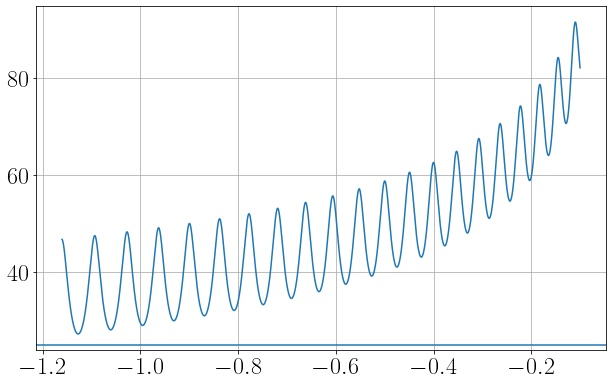

In [71]:
plt.plot(h.sample_times[:i0],-freq_s)
plt.axhline(25)

In [7]:
files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json')

In [8]:
def extract_id(files,cycles=5):
    '''
    files: list 
        return of glob for json metadata
        
    return:
        ID
    --------------------------------------
    '''
    ret = []
    for fp in files:
        f = open(fp)
        metadata = json.load(f)
        if metadata['id-tag'] == 'ecc' and float(metadata['number-of-orbits'])>=cycles:
            number = fp.split(':eBBH:')[1].split('-')[0]
            ret.append(number)
    return ret

In [9]:
nrid = extract_id(files)

In [10]:
nrid

['1632',
 '1400',
 '1101',
 '1097',
 '1256',
 '1517',
 '1333',
 '1740',
 '1164',
 '1356',
 '1241',
 '1201',
 '1540',
 '1425',
 '1156',
 '1539',
 '1378',
 '1216',
 '1141',
 '1297',
 '1138',
 '1133',
 '1808',
 '1140',
 '1601',
 '1883',
 '1764',
 '1217',
 '1379',
 '1809',
 '1139',
 '1296',
 '1157',
 '1424',
 '1200',
 '1701',
 '1538',
 '1741',
 '1401',
 '1633',
 '1332',
 '1516',
 '1257',
 '1830',
 '1096',
 '1100',
 '1249',
 '1242',
 '1355',
 '1102',
 '1094',
 '1255',
 '1514',
 '1330',
 '1471',
 '1631',
 '1294',
 '1448',
 '1215',
 '1149',
 '1142',
 '1283',
 '1288',
 '1703',
 '1202',
 '1209',
 '1900',
 '1155',
 '1789',
 '1702',
 '1289',
 '1282',
 '1788',
 '1154',
 '1208',
 '1203',
 '1295',
 '1143',
 '1148',
 '1214',
 '1470',
 '1331',
 '1515',
 '1254',
 '1095',
 '1103',
 '1402',
 '1243',
 '1494',
 '1248',
 '1354',
 '1210',
 '1763',
 '1147',
 '1446',
 '1291',
 '1135',
 '1207',
 '1423',
 '1150',
 '1787',
 '1286',
 '1162',
 '1247',
 '1468',
 '1634',
 '1563',
 '1091',
 '1250',
 '1562',
 '1251',
 

In [11]:
max_overlap_over_mtotal(1632,20,'/work/yifan.wang/eccentricity/gitlab-summer-internship/result3')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:23<00:00, 203.46s/it]
